In [2]:
import pandas as pd

df= pd.read_csv('MTA_NYCT_Subway_Elevator_data.csv')
df.head()

,Month,Borough,Equipment Type,Equipment Code,Total Outages,Scheduled Outages,Unscheduled Outages,Entrapments,Time Since Major Improvement,AM Peak Availability,...,PM Peak Availability,PM Peak Hours Available,PM Peak Total Hours,24-Hour Availability,24-Hour Hours Available,24-Hour Total Hours,Station Name,Station MRN,Station Complex Name,Station Complex MRN
0,01/01/2015,Queens,Elevator,EL426,2,2,0,0,95.0,1.000000,...,1.000000,124.000000,124.0,0.986022,733.600000,744.0,JUNCTIONBLVD-FLS-7,451,Junction Blvd - Station,451
1,01/01/2015,Queens,Elevator,EL411,6,5,1,0,313.0,0.984677,...,0.981586,121.716667,124.0,0.962522,716.116667,744.0,SUTPHINBLVD-ARCHERAV-JFKAIRPORT-QBL-E/J/Z,279,Sutphin Blvd-Archer Av-JFK Airport - Station,279
2,01/01/2015,Brooklyn,Escalator,ES332,16,3,13,0,1039.0,0.958199,...,0.903360,112.016667,124.0,0.932684,693.916667,744.0,MYRTLE-WYCKOFFAVS-MYT-M,112,"Myrtle-Wyckoff Avs (L,M)",630
3,01/01/2015,Queens,Elevator,EL449X,0,0,0,0,NaN,1.000000,...,1.000000,124.000000,124.0,1.000000,744.000000,744.0,SUTPHINBLVD-ARCHERAV-JFKAIRPORT-QBL-E/J/Z,279,Sutphin Blvd-Archer Av-JFK Airport - Station,279
4,01/01/2015,Manhattan,Escalator,ES239,7,3,4,0,655.0,0.978898,...,0.973790,120.750000,124.0,0.964315,717.450000,744.0,5AV/53ST-QBL-E/M,276,5 Av/53 St - Station,276


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73467 entries, 0 to 73466
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Month                         73467 non-null  object 
 1   Borough                       73467 non-null  object 
 2   Equipment Type                73467 non-null  object 
 3   Equipment Code                73467 non-null  object 
 4   Total Outages                 73467 non-null  int64  
 5   Scheduled Outages             73467 non-null  int64  
 6   Unscheduled Outages           73467 non-null  int64  
 7   Entrapments                   73467 non-null  int64  
 8   Time Since Major Improvement  62192 non-null  float64
 9   AM Peak Availability          71421 non-null  float64
 10  AM Peak Hours Available       73467 non-null  float64
 11  AM Peak Total Hours           73467 non-null  float64
 12  PM Peak Availability          71438 non-null  float64
 13  P

In [4]:
df['Month']= pd.to_datetime(df['Month'])

In [6]:
df.groupby('Month')['Total Outages'].sum()

Month
2015-01-01    2535
2015-02-01    2470
2015-03-01    2767
2015-04-01    2521
2015-05-01    2718
              ... 
2025-02-01    3142
2025-03-01    3258
2025-04-01    3208
2025-05-01    3139
2025-06-01    3305
Name: Total Outages, Length: 126, dtype: int64

In [10]:
monthly_unscheduled = df.groupby('Month')['Unscheduled Outages'].sum().to_frame()

In [11]:
df_monthly = df.groupby('Month')['Total Outages'].sum().to_frame()
df_monthly['Unscheduled'] = monthly_unscheduled['Unscheduled Outages']
df_monthly

,Total Outages,Unscheduled
Month,,
2015-01-01,2535,1608
2015-02-01,2470,1563
2015-03-01,2767,1532
2015-04-01,2521,1328
2015-05-01,2718,1570
...,...,...
2025-02-01,3142,1997
2025-03-01,3258,2022
2025-04-01,3208,1897


In [12]:
df_monthly['unscheduled_percent'] = df_monthly['Unscheduled']/df_monthly['Total Outages'] *100
df_monthly.head()

,Total Outages,Unscheduled,unscheduled_percent
Month,,,
2015-01-01,2535,1608,63.431953
2015-02-01,2470,1563,63.279352
2015-03-01,2767,1532,55.366823
2015-04-01,2521,1328,52.677509
2015-05-01,2718,1570,57.763061


<Axes: xlabel='Month'>

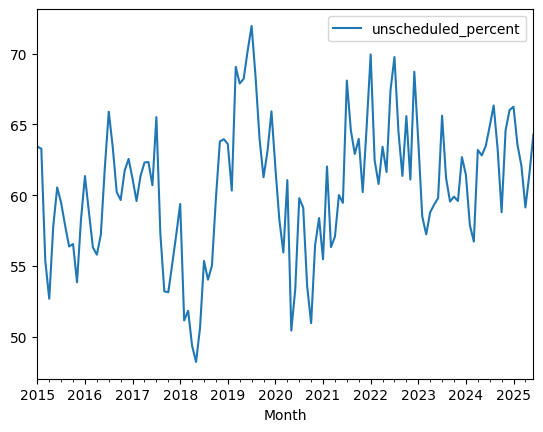

In [16]:
df_monthly.plot( y="unscheduled_percent")